# Практическое занятие №3

*П.Н. Советов, РТУ МИРЭА*

## 1. Модули

**1.1.** (уровень сложности: простейший)

Напишите код, состоящий из двух модулей, для получения следующего сообщения об ошибке:

```
AttributeError: partially initialized module '...' has no attribute '...' (most likely due to a circular import)
```

###### 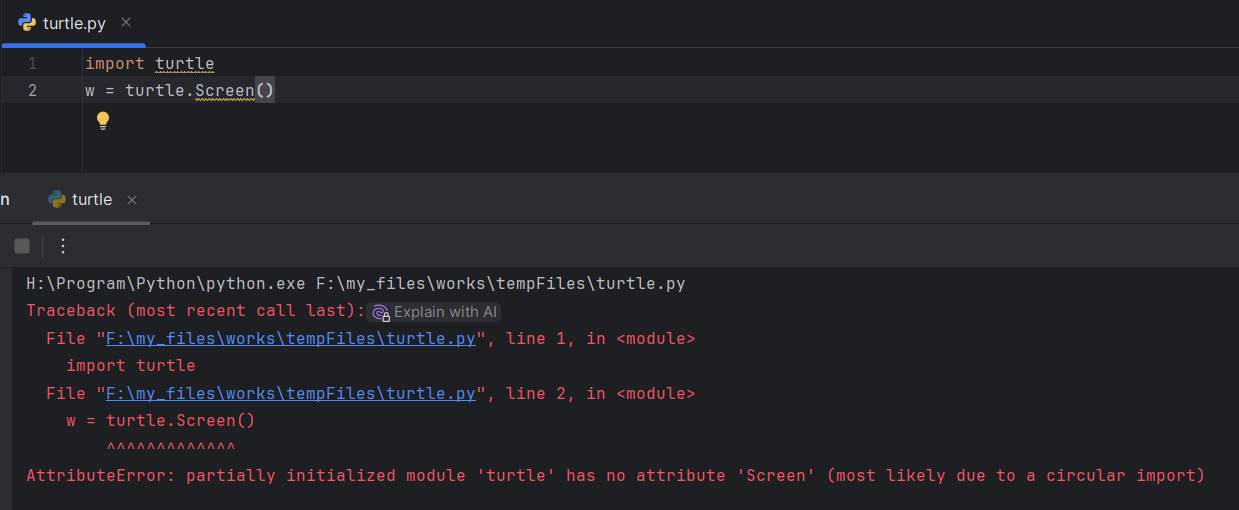

**1.2.** (уровень сложности: простейший)

Как вы думаете, модуль загружается один раз или же загружается каждый раз при очередном импорте? Докажите правильность вашей гипотезы примером кода.

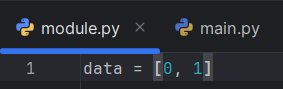
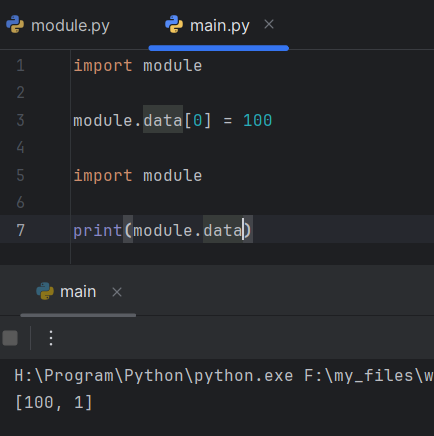

**1.3.** (уровень сложности: простейший)

Предположим, мы хотим изменить значение глобальной переменной модуля, но так, чтобы новое значение отразилось на всех пользователях этого модуля. К чему приведет следующий код? Что можно предложить взамен?

```Python
from some_module import GLOBAL_VAR
GLOBAL_VAR = 42
```

In [ ]:
some_module.GLOBAL_VAR = 42

**1.4.** (уровень сложности: простейший)

Неконтролируемый импорт с помощью *, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Использование звездочки не должно приводить к импорту всех глобальных имен вашего модуля.

In [25]:
%%writefile controlled_module.py

PUBLIC_VAR = "Hello"
public_func = lambda: "Публичная функция"


HIDDEN_VAR = "world"
hidden_func = lambda: "Приватная функция"

__all__ = ["PUBLIC_VAR", "public_func"]  

Overwriting controlled_module.py


In [27]:
from controlled_module import *  

print(PUBLIC_VAR)           
print(public_func())        

try:
    print(HIDDEN_VAR)      
except NameError as e:
    print(f"Ошибка: {e}")   

try:
    print(hidden_func())   
except NameError as e:
    print(f"Ошибка: {e}")   

Доступно при импорте *
Публичная функция
Ошибка: name 'HIDDEN_VAR' is not defined
Ошибка: name 'hidden_func' is not defined


**1.5.** (уровень сложности: низкий)

Напишите функцию load_config(filename) для загрузки скрипта на Питоне в виде программируемого конфигурационного формата. Приведите плюсы и минусы подходов с использованием импорта и прямого выполнения кода.

**1.6.** (уровень сложности: средний)

Создайте учебный пакет, состоящий из нескольких модулей и JSON-файла. Получите дистрибутив, готовый для установки с помощью pip. Проверьте результат установки в виртуальном окружении.

## 2. Процедурная графика

**2.1.** (уровень сложности: средний)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

Пример работы генератора показан ниже.

![](data/sprite1.png)

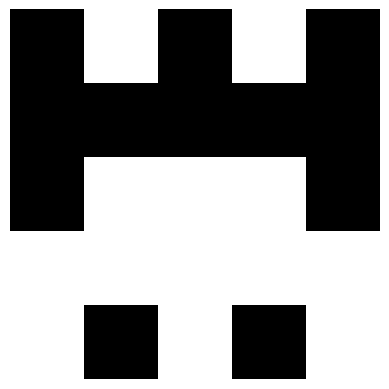

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice

sprite = np.zeros((5, 5), dtype=int)

for y in range(5):
    for x in range(3):
        pixel = choice([0, 1])
        sprite[y, x] = pixel
        sprite[y, 4 - x] = pixel

plt.imshow(sprite, cmap='binary')
plt.axis('off')
plt.show()

**2.2.** (уровень сложности: средний)

Создайте генератор карт спрайтов. Пример работы этого генератора показан ниже.


![](data/sprite2.png)

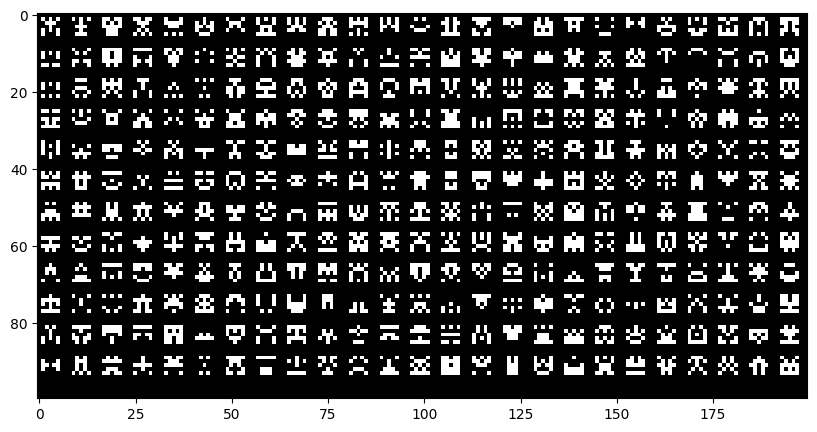

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice

MAP_WIDTH = 200
MAP_HEIGHT = 100
SPRITE_SIZE = 5
SPACING = 3

def generate_sprite():
    sprite = np.zeros((SPRITE_SIZE, SPRITE_SIZE), dtype=int)  
    
    for y in range(SPRITE_SIZE):
        for x in range(3):  
            if choice([True, False]):  
                sprite[y, x] = 1
                sprite[y, SPRITE_SIZE-1-x] = 1 
    return sprite

sprite_map = np.ones((MAP_HEIGHT, MAP_WIDTH), dtype=int)

for y in range(1, MAP_HEIGHT - SPRITE_SIZE, SPRITE_SIZE + SPACING):
    for x in range(1, MAP_WIDTH - SPRITE_SIZE, SPRITE_SIZE + SPACING):
        sprite = generate_sprite()
        sprite_map[y:y+SPRITE_SIZE, x:x+SPRITE_SIZE] = sprite

plt.figure(figsize=(10, 5))
plt.imshow(sprite_map, cmap='binary')
plt.show()

**2.3.** (уровень сложности: высокий)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

Пример работы этого генератора показан ниже.


![](data/sprite3.png)

Использовалась палитра из PICO-8:

```
1D2B53
7E2553
008751
AB5236
5F574F
C2C3C7
FFF1E8
FF004D
FFA300
FFEC27
00E436
29ADFF
83769C
FF77A8
FFCCAA
```

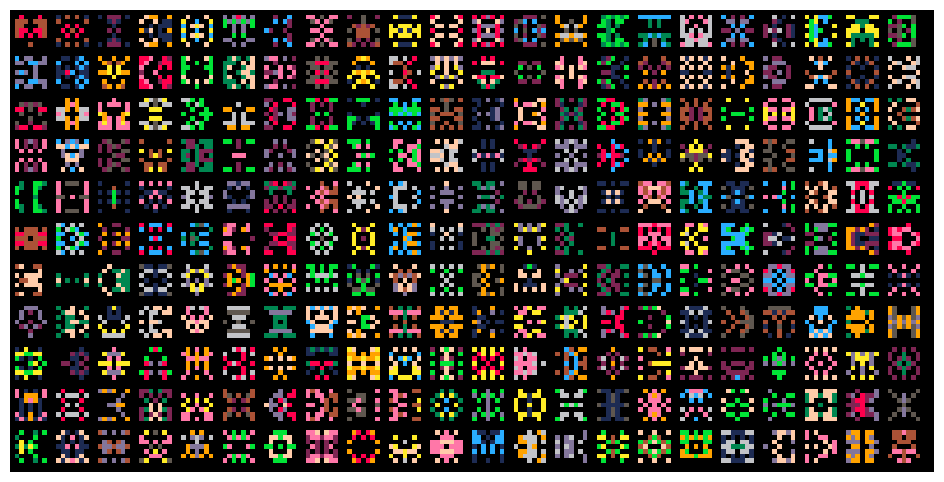

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice, randint, sample

MAP_WIDTH = 200
MAP_HEIGHT = 100
SPRITE_WIDTH = 7
SPRITE_HEIGHT = 7
SPACING = 2

PALETTE = [
    "#1D2B53", "#7E2553", "#008751", "#AB5236", "#5F574F",
    "#C2C3C7", "#FFF1E8", "#FF004D", "#FFA300", "#FFEC27",
    "#00E436", "#29ADFF", "#83769C", "#FF77A8", "#FFCCAA"
]

def generate_sprite(symmetry='vertical'):
    sprite = np.zeros((SPRITE_HEIGHT, SPRITE_WIDTH), dtype=int)
    
    colors = sample(range(1, len(PALETTE)), k=randint(2, 3))
    
    for y in range((SPRITE_HEIGHT + 1) // 2 if symmetry in ['horizontal', 'central'] else SPRITE_HEIGHT):
        for x in range((SPRITE_WIDTH + 1) // 2 if symmetry in ['vertical', 'central'] else SPRITE_WIDTH):
            if choice([True, False]):
                color = choice(colors)
                sprite[y, x] = color
                
                if symmetry == 'vertical':
                    sprite[y, SPRITE_WIDTH - 1 - x] = color
                elif symmetry == 'horizontal':
                    sprite[SPRITE_HEIGHT - 1 - y, x] = color
                elif symmetry == 'central':
                    sprite[y, SPRITE_WIDTH - 1 - x] = color
                    sprite[SPRITE_HEIGHT - 1 - y, x] = color
                    sprite[SPRITE_HEIGHT - 1 - y, SPRITE_WIDTH - 1 - x] = color
    return sprite

sprite_map = np.zeros((MAP_HEIGHT, MAP_WIDTH), dtype=int)

for y in range(1, MAP_HEIGHT - SPRITE_HEIGHT, SPRITE_HEIGHT + SPACING):
    for x in range(1, MAP_WIDTH - SPRITE_WIDTH, SPRITE_WIDTH + SPACING):
        symmetry = choice(['vertical', 'horizontal', 'central'])
        sprite = generate_sprite(symmetry)
        sprite_map[y:y+SPRITE_HEIGHT, x:x+SPRITE_WIDTH] = sprite

cmap = plt.cm.colors.ListedColormap(['black'] + PALETTE)

plt.figure(figsize=(12, 6))
plt.imshow(sprite_map, cmap=cmap)
plt.axis('off')
plt.show()

**2.4.** (уровень сложности: высокий)

Слышали ли вы об играх с процедурно сгенерированными вселенными? Оказывается, у современной Elite Dangerous есть далекий предок – игра Elite 1984 года. В Elite была впечатляющая по тем временам 3d графика и целых 8 галактик для исследования, каждая из которых содержала 256 солнечных систем. Удивительно, но все это работало на 8-битном компьютере, а код игры составлял микроскопические 32 Кбайт.

Изобразите легендарную первую галактику из игры Elite. Для этого потребуется портировать алгоритм процедурной генерации, приведенный далее на C/C++. Обратите внимание, [этот код](http://www.iancgbell.clara.net/elite/text/) написан в низкоуровневом стиле, поскольку был получен из оригинальной игры, которая, в свою очередь, была написана на языке ассемблера. Вам необходимо при портировании следовать хорошему стилю написания программ на Питоне.

Каждая галактика в игре генерируется на основе всего трех 16-битных чисел w0, w1 и w2. Для первой галактики это 0x5A4A, 0x0248 и 0xB753. Имена звезд генерируются с помощью массива слогов.

```C
char pairs[] = "..LEXEGEZACEBISO"
"USESARMAINDIREA."
"ERATENBERALAVETI"
"EDORQUANTEISRION"; /* Dots should be nullprint characters */

typedef struct
{
 uint x;
 uint y; /* One byte unsigned */
 uint economy; /* These two are actually only 0-7 */
 uint govtype;
 uint techlev; /* 0-16 i think */
 uint population; /* One byte */
 uint productivity; /* Two byte */
 uint radius; /* Two byte (not used by game at all) */
 fastseedtype goatsoupseed;
 char name[12];
} plansys;

void tweakseed(seedtype *s)
{
 uint16 temp;
 temp = ((*s).w0) + ((*s).w1) + ((*s).w2); /* 2 byte aritmetic */
 (*s).w0 = (*s).w1;
 (*s).w1 = (*s).w2;
 (*s).w2 = temp;
}

/**-Generate system info from seed **/

plansys makesystem(seedtype *s)
{
 plansys thissys;
 uint pair1, pair2, pair3, pair4;
 uint16 longnameflag = ((*s).w0) & 64;

 thissys.x = (((*s).w1) >> 8);
 thissys.y = (((*s).w0) >> 8);

 thissys.govtype = ((((*s).w1) >> 3) & 7); /* bits 3,4 &5 of w1 */

 thissys.economy = ((((*s).w0) >> 8) & 7); /* bits 8,9 &A of w0 */
 if (thissys.govtype <= 1)
 {
 thissys.economy = ((thissys.economy) | 2);
 }

 thissys.techlev = ((((*s).w1) >> 8) & 3) + ((thissys.economy) ^ 7);
 thissys.techlev += ((thissys.govtype) >> 1);
 if (((thissys.govtype) & 1) == 1) thissys.techlev += 1;
 /* C simulation of 6502's LSR then ADC */

 thissys.population = 4 * (thissys.techlev) + (thissys.economy);
 thissys.population += (thissys.govtype) + 1;

 thissys.productivity = (((thissys.economy) ^ 7) + 3)*((thissys.govtype) + 4);
 thissys.productivity *= (thissys.population) * 8;

 thissys.radius = 256 * (((((*s).w2) >> 8) & 15) + 11) + thissys.x;

 thissys.goatsoupseed.a = (*s).w1 & 0xFF;;
 thissys.goatsoupseed.b = (*s).w1 >> 8;
 thissys.goatsoupseed.c = (*s).w2 & 0xFF;
 thissys.goatsoupseed.d = (*s).w2 >> 8;

 pair1 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair2 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair3 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair4 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 /* Always four iterations of random number */

 (thissys.name)[0] = pairs[pair1];
 (thissys.name)[1] = pairs[pair1 + 1];
 (thissys.name)[2] = pairs[pair2];
 (thissys.name)[3] = pairs[pair2 + 1];
 (thissys.name)[4] = pairs[pair3];
 (thissys.name)[5] = pairs[pair3 + 1];

 if (longnameflag) /* bit 6 of ORIGINAL w0 flags a four-pair name */
 {
 (thissys.name)[6] = pairs[pair4];
 (thissys.name)[7] = pairs[pair4 + 1];
 (thissys.name)[8] = 0;
 }
 else (thissys.name)[6] = 0;
 stripout(thissys.name, '.');

 return thissys;
}
```

Описание первой галактики можно найти [здесь](https://wiki.alioth.net/index.php/Oolite_planet_list/Galaxy_1).

Ниже показан пример визуализации первой галактики.

![](data/galaxy.png)

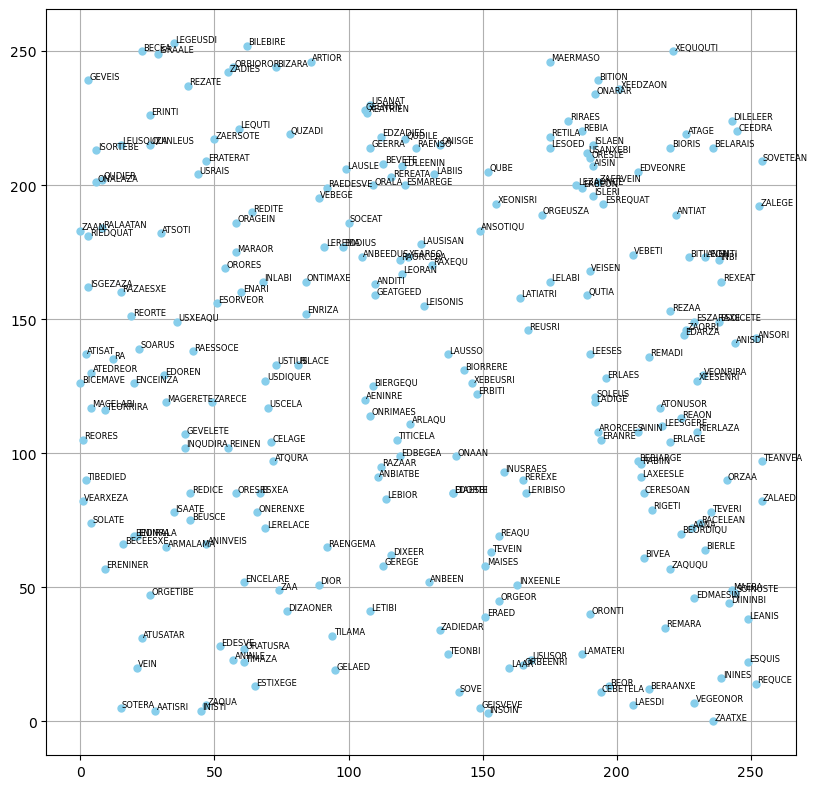

In [4]:
import matplotlib.pyplot as plt

from dataclasses import dataclass

@dataclass
class Seed:
    w0: int
    w1: int
    w2: int

@dataclass
class GoatSoupSeed:
    a: int
    b: int
    c: int
    d: int

@dataclass
class Planet:
    name: str
    x: int
    y: int
    economy: int
    govtype: int
    techlev: int
    population: int
    productivity: int
    radius: int
    goatsoupseed: GoatSoupSeed

pairs = (
    "..LEXEGEZACEBISOUSESARMAINDIREA."
    "ERATENBERALAVETIEDORQUANTEISRION"
)

def tweakseed(seed: Seed):
    temp = (seed.w0 + seed.w1 + seed.w2) & 0xFFFF
    seed.w0, seed.w1, seed.w2 = seed.w1, seed.w2, temp

def makesystem(seed: Seed) -> Planet:
    original_w0 = seed.w0
    longnameflag = (original_w0 & 0x40) != 0

    x = (seed.w1 >> 8) & 0xFF
    y = (seed.w0 >> 8) & 0xFF
    govtype = (seed.w1 >> 3) & 7
    economy = (seed.w0 >> 8) & 7

    if govtype <= 1:
        economy |= 2

    techlev = ((seed.w1 >> 8) & 3) + (economy ^ 7)
    techlev += (govtype >> 1)
    if govtype & 1:
        techlev += 1

    population = 4 * techlev + economy + govtype + 1
    productivity = ((economy ^ 7) + 3) * (govtype + 4) * population * 8
    radius = 256 * (((seed.w2 >> 8) & 0x0F) + 11) + x

    goat = GoatSoupSeed(
        a = seed.w1 & 0xFF,
        b = seed.w1 >> 8,
        c = seed.w2 & 0xFF,
        d = seed.w2 >> 8
    )

    name = ''
    for _ in range(3):
        pair = 2 * ((seed.w2 >> 8) & 0x1F)
        name += pairs[pair:pair+2]
        tweakseed(seed)

    if longnameflag:
        pair = 2 * ((seed.w2 >> 8) & 0x1F)
        name += pairs[pair:pair+2]
        tweakseed(seed)

    name = name.replace('.', '')

    return Planet(name, x, y, economy, govtype, techlev, population, productivity, radius, goat)

def generate_galaxy(seed: Seed, count=256):
    planets = []
    for _ in range(count):
        planets.append(makesystem(seed))
    return planets

# Генерация галактики
initial_seed = Seed(0x5A4A, 0x0248, 0xB753)
galaxy = generate_galaxy(initial_seed)

# Построение карты
fig, ax = plt.subplots(figsize=(10, 8))
for planet in galaxy:
    ax.plot(planet.x, planet.y, 'o', markersize=5, color='skyblue')
    ax.text(planet.x + 0.5, planet.y + 0.5, planet.name, fontsize=6)

ax.grid(True)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


**2.5.** (уровень сложности: высокий)

Создайте генератор растений с помощью алгоритма освоения пространства (space colonization algorithm). Этот алгоритм описан в [статье](http://algorithmicbotany.org/papers/colonization.egwnp2007.large.pdf) 2007 года и позволяет моделировать различные природные явления: корни и ветви деревьев, сети рек и дорог и так далее.

Основная идея алгоритма состоит в том, чтобы разместить в некоторой области случайным образом точки притяжения. К этим точкам на каждой итерации тянутся узлы моделируемого растения или дерева. В процессе создаются ветки, а точки поглощаются.

Алгоритм содержит следующие шаги.

1. Создание N случайных точек притяжения, а также одного или нескольких начальных узлов дерева.
2. Поглощение ближайших точек притяжения – то есть тех точек, которые находятся к узлам дерева ближе, чем расстояние $d_k$.
3. Нахождение для каждой точки притяжения ближайшего к ней узла дерева $v$ на дистанции, не превышающей $d_i$. Для каждого $v$ формируется множество $S(v)$, которое может содержать несколько точек притяжения.
4. Если $S(v)$ не пусто, то формируется очередной узел $v'$ на расстоянии $D$ и создается новый сегмент $(v, v')$ с помощью следующих формул:
$$
v' = v + \hat{n}D, \hat{n} = \frac{\vec{n}}{\lVert\vec{n}\rVert},\vec{n} = \sum_{s \in S(v)} \frac{s - v}{\lVert s - v \rVert}
$$
5. Переход на шаг 2, пока не исчерпано заданное число шагов.

Для изображения сегментов используйте LineCollection из Matplotlib.

Ниже приведен пример сгенерированного растения.

![](data/plant1.png)

Растения могут расти совместно:

![](data/plant2.png)

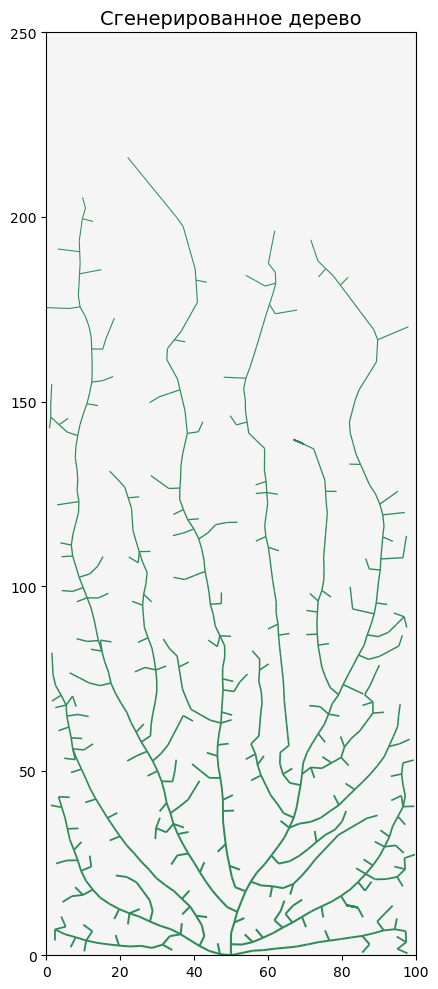

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.spatial import cKDTree

num_attractors = 500       
influence_radius = 25       
kill_distance = 2          
step_size = 3              
iterations = 200           
width, height = 100, 250   

np.random.seed(42)
attractors = np.column_stack([
    np.random.uniform(0, width, num_attractors),
    np.random.beta(1, 3, num_attractors) * height 
])

nodes = [np.array([width/2, 0])]
segments = []

for _ in range(iterations):
    if len(attractors) == 0:
        break
    
    node_tree = cKDTree(nodes)
    distances, closest_indices = node_tree.query(attractors)

    mask = distances >= kill_distance
    attractors = attractors[mask]
    closest_indices = closest_indices[mask]
    distances = distances[mask]

    mask = distances < influence_radius
    filtered_attractors = attractors[mask]
    filtered_indices = closest_indices[mask]

    new_nodes = []
    for idx in np.unique(filtered_indices):
        group_points = filtered_attractors[filtered_indices == idx]
        directions = group_points - nodes[idx]
        mean_dir = np.mean(directions, axis=0)
        norm = np.linalg.norm(mean_dir)
        
        if norm > 0:
            new_node = nodes[idx] + (mean_dir/norm) * step_size
            segments.append([nodes[idx], new_node])
            new_nodes.append(new_node)
    
    nodes.extend(new_nodes)

plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
ax.set_facecolor('#f5f5f5')

line_widths = np.linspace(1.5, 0.5, len(segments))
lc = LineCollection(segments, linewidths=line_widths, colors='#2e8b57')
ax.add_collection(lc)

plt.title('Сгенерированное дерево', fontsize=14)
plt.tight_layout()
plt.show()

**2.6.** (уровень сложности: высокий)

Создайте генератор деревьев на основе алгоритма освоения пространства. Деревья должны иметь ствол и листья. Примеры автоматически сгенерированных деревьев показаны далее:

![](data/tree1.png)

![](data/tree2.png)

![](data/tree3.png)

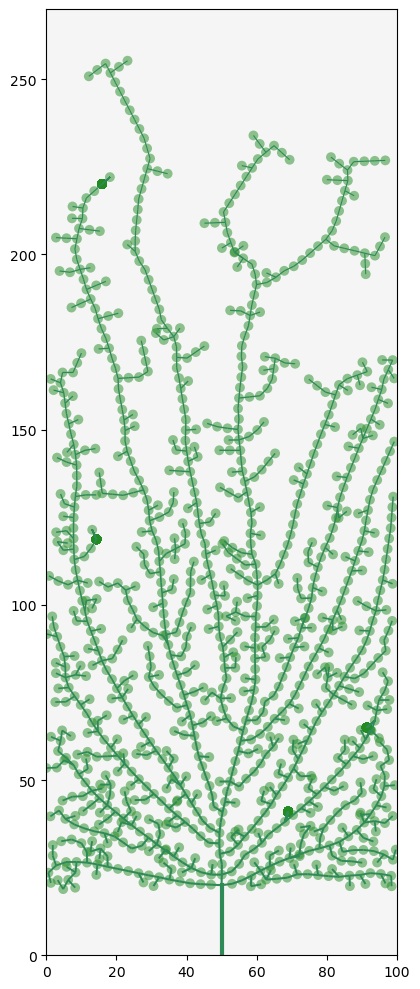

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.spatial import cKDTree

num_attractors = 1000
influence_radius = 25
kill_distance = 2
step_size = 3
iterations = 200
width, height = 100, 250
trunk_height = 20  # Высота ствола

np.random.seed(42)
# Точки притяжения без смещения
attractors = np.column_stack([
    np.random.uniform(0, width, num_attractors),
    np.random.beta(1, 3, num_attractors) * height
])

# Начальный узел - внизу (y=0)
nodes = [np.array([width/2, 0])]
segments = []

# Генерация дерева
for _ in range(iterations):
    if len(attractors) == 0:
        break
    
    node_tree = cKDTree(nodes)
    distances, closest_indices = node_tree.query(attractors)
    
    mask = distances >= kill_distance
    attractors = attractors[mask]
    closest_indices = closest_indices[mask]
    distances = distances[mask]
    
    mask = distances < influence_radius
    filtered_attractors = attractors[mask]
    filtered_indices = closest_indices[mask]
    
    new_nodes = []
    for idx in np.unique(filtered_indices):
        group_points = filtered_attractors[filtered_indices == idx]
        directions = group_points - nodes[idx]
        mean_dir = np.mean(directions, axis=0)
        norm = np.linalg.norm(mean_dir)
        
        if norm > 0:
            new_node = nodes[idx] + (mean_dir/norm) * step_size
            segments.append([nodes[idx], new_node])
            new_nodes.append(new_node)
    
    nodes.extend(new_nodes)

# Теперь поднимаем всё дерево вверх на высоту ствола
shift = trunk_height
shifted_segments = [[[x1, y1 + shift], [x2, y2 + shift]] for (x1, y1), (x2, y2) in segments]
leaf_positions = np.array([seg[1] for seg in shifted_segments])

plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xlim(0, width)
ax.set_ylim(0, height + trunk_height)
ax.set_aspect('equal')
ax.set_facecolor('#f5f5f5')

ax.plot([width/2, width/2],
        [0, trunk_height],
        color='#2e8b57', linewidth=3)

line_widths = np.linspace(1.5, 0.5, len(shifted_segments))
lc = LineCollection(shifted_segments, linewidths=line_widths, colors='#2e8b57')
ax.add_collection(lc)

# Листья
plt.scatter(leaf_positions[:, 0], leaf_positions[:, 1],
            color='#228B22', s=50, edgecolors='none', alpha=0.5)

plt.tight_layout()
plt.show()


**2.7.** (уровень сложности: низкий)

Реализуйте функцию, которая по имени графического файла возвращает двумерный массив с помощью списков Питона, содержащий RGB-значения картинки. Эта функция понадобится для решения остальных задач этого раздела.

In [73]:
from PIL import Image
import numpy as np

def image_to_rgb_array(filename):
    with Image.open(filename) as img:
        rgb_img = img.convert('RGB')

        img_array = np.array(rgb_img)
        
        height, width = img_array.shape[:2]
        rgb_list = [
            [
                [int(pixel[0]), int(pixel[1]), int(pixel[2])] 
                for pixel in row
            ] 
            for row in img_array
        ]
        
        return rgb_list

rgb_array = image_to_rgb_array("image.jpg")

if rgb_array:
    for row in rgb_array[:3]:
        for pixel in row[:3]:
            print(pixel, end=' ')
        print()

[110, 141, 81] [115, 146, 86] [108, 139, 79] 
[109, 140, 80] [111, 142, 82] [104, 135, 75] 
[107, 138, 78] [103, 134, 74] [99, 130, 70] 


**2.8.** (уровень сложности: средний)

Диаграммы Вороного находят широкое применение не только в математике, но и, к примеру, в архитектуре, а также в процедурной графике. Названы эти диаграммы в честь русского математика [Георгия Феодосьевича Вороного](https://www.mathnet.ru/links/bd2cf5586728b0e7a7393c5d7cc7b23d/cheb698.pdf). Для создания диаграммы Вороного необходимо выбрать множество точек и разбить плоскость (n-мерный случай рассматривать не будем) на области, для каждой из которых только одна из выбранных точек окажется ближайшей.

Мы используем диаграммы Вороного для реализации фильтра изображения. Результат фильтрации может напоминать нарисованную кистью картину или мозаику. Для получения результата необходимо выбрать N случайных точек исходного изображения и построить по ним диаграмму. 

Существуют различные алгоритмы построения диаграмм Вороного, но мы воспользуемся самым примитивным подходом – просто последуем определению и переберем все координаты изображения-результата на предмет расстояния до случайно выбранных точек исходного изображения.

Ниже показано исходное изображение:

![](data/winter1.jpg)

Результат фильтрации для N = 500:

![](data/winter2.png)

Результат фильтрации для N = 2000:

![](data/winter3.png)

Время выполнения: 306.99 с


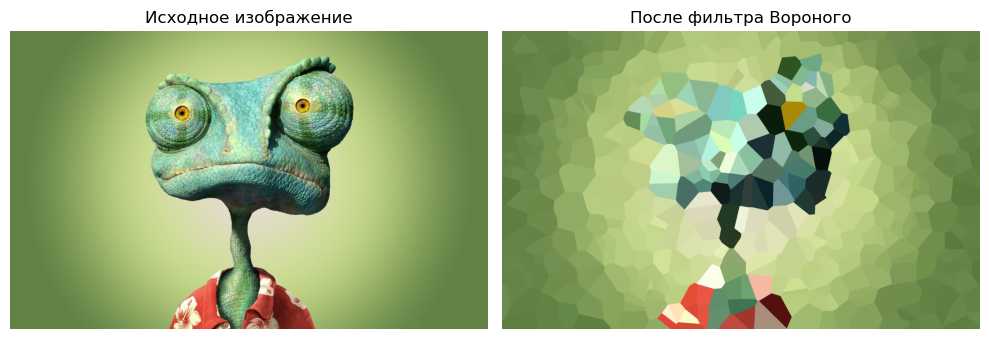

In [12]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
from time import time

def load_image(filename):
    with Image.open(filename) as img:
        return np.array(img.convert('RGB'))

def save_image(array, filename):
    Image.fromarray(array.astype('uint8')).save(filename)

def voronoi_filter(input_image, num_points=100):
    height, width = input_image.shape[:2]
    
    points = np.array([
        (random.randint(0, width-1), random.randint(0, height-1))
        for _ in range(num_points)
    ])
    
    point_colors = input_image[points[:,1], points[:,0]]
    
    output = np.zeros_like(input_image)
    
    for y in range(height):
        for x in range(width):
            distances = np.sum((points - [x,y])**2, axis=1)
            closest = np.argmin(distances)
            output[y,x] = point_colors[closest]
    
    return output

if __name__ == "__main__":
    input_img = load_image("image.jpg")

    start = time()
    output_img = voronoi_filter(input_img, num_points=500)
    end = time() - start

    print(f"Время выполнения: {end:.2f} с")
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.title("Исходное изображение")
    plt.imshow(input_img)
    plt.axis('off')
    
    plt.subplot(122)
    plt.title("После фильтра Вороного")
    plt.imshow(output_img)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

**2.9.** (уровень сложности: хакер)

Ускорьте фильтрацию с помощью диаграмм Вороного не меня принципиально алгоритм и не используя сторонние библиотеки.

Время выполнения: 53.85 с


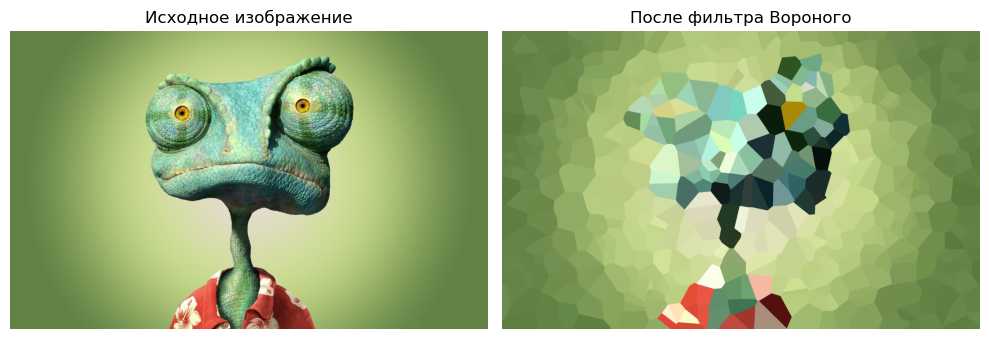

In [13]:
import numpy as np
from PIL import Image
import random

def voronoi_filter_fast(input_image, num_points=100):
    height, width = input_image.shape[:2]
    
    points = np.array([(random.randint(0, width-1), random.randint(0, height-1)) for _ in range(num_points)])
    point_colors = input_image[points[:, 1], points[:, 0]]
    
    x_coords = np.arange(width)
    y_coords = np.arange(height)
    xx, yy = np.meshgrid(x_coords, y_coords)
    
    min_distances = np.full((height, width), np.inf)
    closest_points = np.zeros((height, width), dtype=int)
    
    for i, (px, py) in enumerate(points):
        distances = (xx - px)**2 + (yy - py)**2
        mask = distances < min_distances
        min_distances[mask] = distances[mask]
        closest_points[mask] = i
    
    output = point_colors[closest_points]
    
    return output

if __name__ == "__main__":
    with Image.open("image.jpg") as img:
        input_img = np.array(img.convert('RGB'))

    start = time()
    result = voronoi_filter_fast(input_img, num_points=500)
    end = time() - start

    print(f"Время выполнения: {end:.2f} с")

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.title("Исходное изображение")
    plt.imshow(input_img)
    plt.axis('off')
    
    plt.subplot(122)
    plt.title("После фильтра Вороного")
    plt.imshow(output_img)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

**2.10.** (уровень сложности: средний)

Реализуйте простой [алгоритм](https://github.com/s-macke/VoxelSpace) трехмерной визуализации воксельных ландшафтов на основе текстуры и карты высот.

Исходные данные: [текстура](data/texture.png), [карта высот](data/heightmap.png).

Идея алгоритма заключается в послойном сканировании, одна горизонтальная линия за другой, значений из текстуры с учетом дистанции от камеры, и размещении на экране каждой точки слоя в виде столбца, высота которого извлекается из карты высот, а цвет – из текстуры.


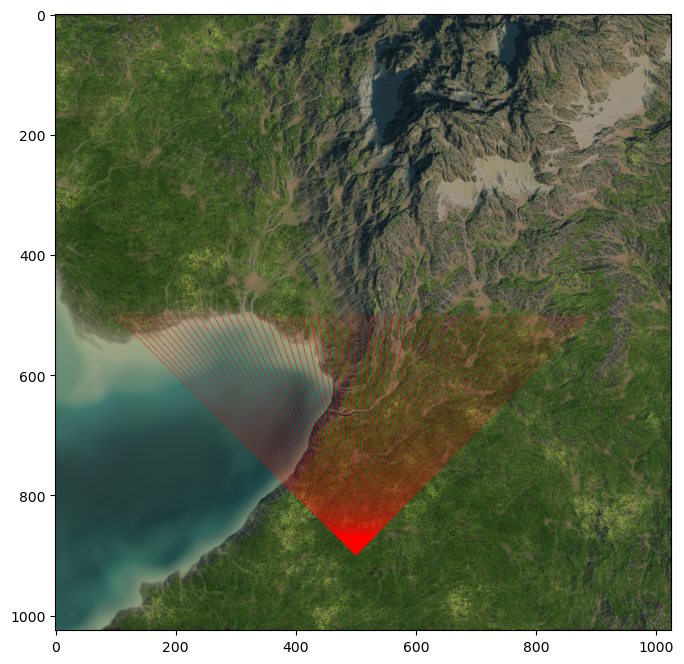

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def visualize_camera_view(texture_path, heightmap_path, camera_pos, screen_width, view_depth):
    texture = np.array(Image.open(texture_path).convert('RGB'))
    heightmap = np.array(Image.open(heightmap_path).convert('L'))
    
    visualization = texture.copy()
    tex_height, tex_width = texture.shape[:2]
    cam_x, cam_y = camera_pos
    
    # Вычисляем границы области обзора
    min_y = max(0, cam_y - view_depth)
    max_y = min(tex_height - 1, cam_y)

    for y in range(min_y, max_y + 1):
        z = cam_y - y  # Глубина текущего слоя
        x_start = int(cam_x - z)
        x_end = int(cam_x + z)
        
        # Корректируем границы, чтобы не выйти за пределы изображения
        x_start = max(0, x_start)
        x_end = min(tex_width - 1, x_end)
        
        # Вычисляем ширину текущего слоя
        layer_width = x_end - x_start + 1
        
        if layer_width > 0:
            # Вычисляем шаг между пикселями на экране
            dx = layer_width / screen_width
            
            # Помечаем пиксели в области видимости
            for screen_x in range(screen_width):
                x = int(x_start + screen_x * dx)
                visualization[y, x] = [255, 0, 0]
    
    return visualization
    
texture_path = "texture.jpg"
heightmap_path = "heightmap.jpg"
camera_pos = (500, 900)  # (x, y)
screen_width = 64
view_depth = 400

result = visualize_camera_view(texture_path, heightmap_path, camera_pos, screen_width, view_depth)

plt.figure(figsize=(12, 8))
plt.imshow(result)
plt.show()

**2.11.** (уровень сложности: средний)

Изобразите текстуру в трехмерном пространстве, используя за основу алгоритм, реализованный в предыдущей задаче. Вам потребуется написать функцию для изображения вертикальных линий. Как и ранее, используйте алгоритм художника – то есть начинайте рисовать от наиболее отдаленных слоев. Цвет линии извлекается из текстуры, а высота текстуры масштабируется с учетом z и переменной, задающей положение горизонта (horizon).

Пример:

![](data/voxel2.png)

**2.12.** (уровень сложности: средний)

Изобразите трехмерный ландшафт с использованием доработанного алгоритма из предыдущей задачи. Теперь необходимо задавать высоту вертикальных линий, учитывая карту высот.

Пример:

![](data/voxel3.png)

**2.13.** (уровень сложности: высокий)

Ускорьте визуализацию трехмерного ландшафта из предыдущей задачи. Идея: начинайте рисование от ближайшего слоя и храните текущую строку со значениями высот, чтобы не перерисовывать то, что находится за пределами видимости.

**2.14.** (уровень сложности: высокий)

Создайте генератор текстур и карт высот. Для этого можно, к примеру, использовать метод фрактального шума из практического занятия №1.

Простой пример:

![](data/voxel4.jpg)


**2.15.** (уровень сложности: хакер)

Реализуйте анимацию полета по трехмерному ландшафту, добейтесь приемлемой частоты кадров в секунду.

## 3. Инфографика

Проанализируйте данные, полученные от ЦАП. Для этого можно воспользоваться приведенным ниже кодом.

```Python
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# Сообщения, присланные в ЦАП.
# id, task, variant, group, time
messages = load_csv('messages.csv')

# Результаты проверок сообщений, присланных в ЦАП.
# id, message, time, status
checks = load_csv('checks.csv')

# Состояния задач ЦАП.
# task, variant, group, time, status, achievements
statuses = load_csv('statuses.csv')

# Таблица соответствия номеров групп и их названий.
# id, title
groups = load_csv('groups.csv')

# О статусах см. https://github.com/kispython-ru/dta/blob/main/webapp/models.py#L44-L50
```

In [4]:
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# Сообщения, присланные в ЦАП.
# id, task, variant, group, time
messages = load_csv('messages.csv')

# Результаты проверок сообщений, присланных в ЦАП.
# id, message, time, status
checks = load_csv('checks.csv')

# Состояния задач ЦАП.
# task, variant, group, time, status, achievements
statuses = load_csv('statuses.csv')

# Таблица соответствия номеров групп и их названий.
# id, title
groups = load_csv('groups.csv')

С помощью графиков ответьте на следующие вопросы.

**3.1.** (уровень сложности: средний)

Как по дням недели распределяется активность студентов?

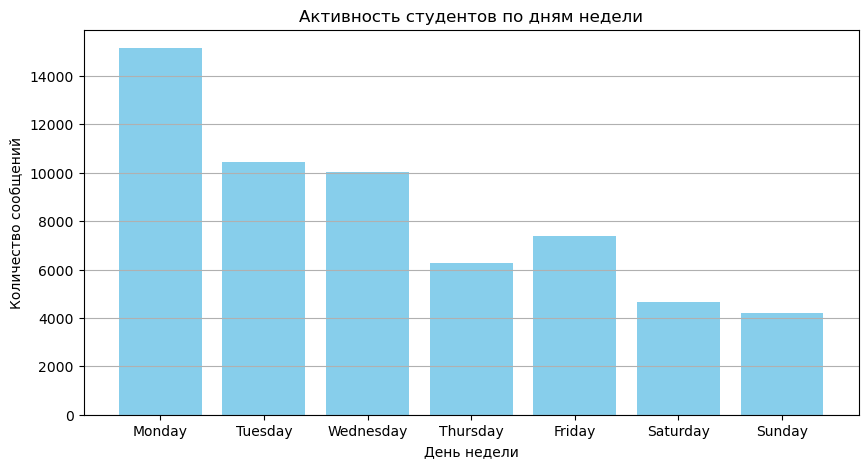

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

days = [parse_time(row[4]).strftime('%A') for row in messages[1:]]

day_counts = Counter(days)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = [day_counts[day] for day in ordered_days]

plt.figure(figsize=(10, 5))
plt.bar(ordered_days, counts, color='skyblue')
plt.title('Активность студентов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество сообщений')
plt.grid(axis='y')
plt.show()


**3.2.** (уровень сложности: средний)

Как по времени суток распределяется активность студентов?

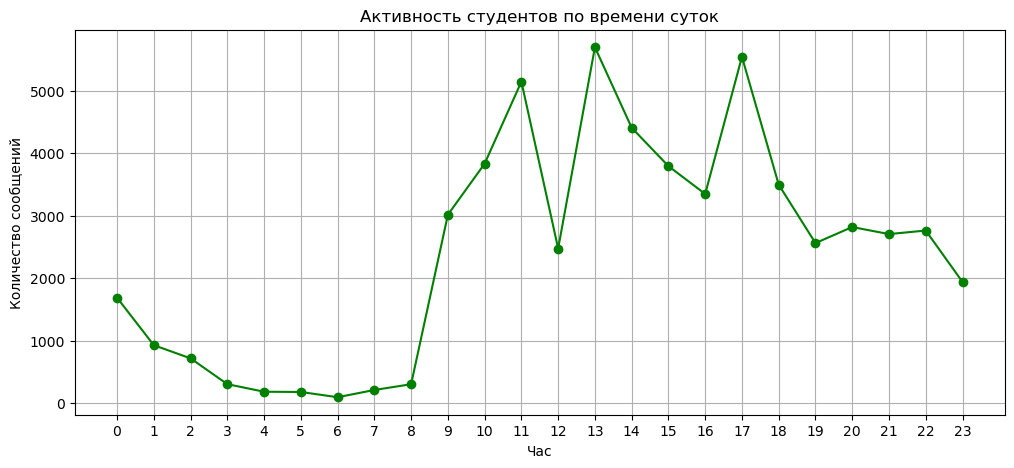

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

hours = [parse_time(row[4]).hour for row in messages[1:]]

hour_counts = Counter(hours)
hours_range = list(range(24))
counts = [hour_counts[h] for h in hours_range]

plt.figure(figsize=(12, 5))
plt.plot(hours_range, counts, marker='o', linestyle='-', color='green')
plt.xticks(hours_range)
plt.title('Активность студентов по времени суток')
plt.xlabel('Час')
plt.ylabel('Количество сообщений')
plt.grid(True)
plt.show()


**3.3.** (уровень сложности: средний)

Сколько сообщений в среднем студенты отправляют по каждой задаче?

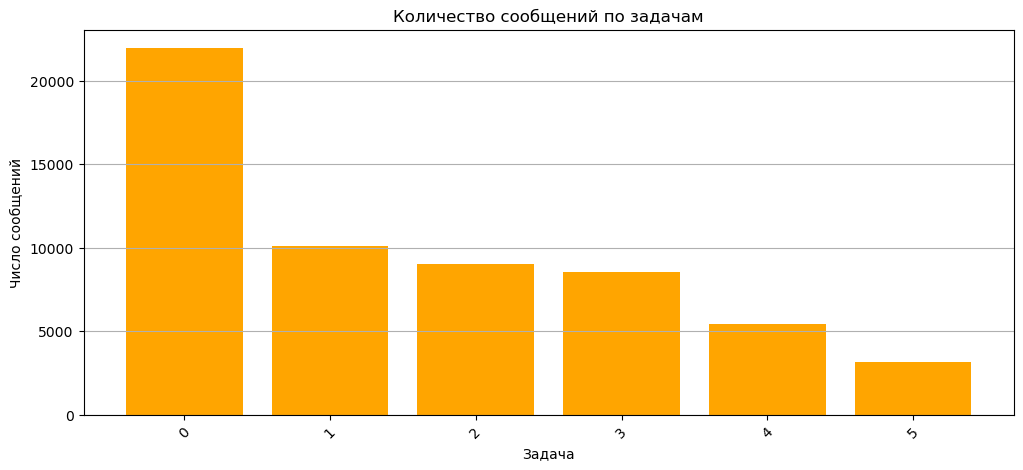

In [38]:
import matplotlib.pyplot as plt

from collections import defaultdict

task_message_counts = defaultdict(int)

for row in messages[1:]:
    task = row[1]  # поле "task"
    task_message_counts[task] += 1

total_messages = sum(task_message_counts.values())
num_tasks = len(task_message_counts)
average_messages_per_task = total_messages / num_tasks

tasks = list(task_message_counts.keys())
counts = list(task_message_counts.values())

plt.figure(figsize=(12, 5))
plt.bar(tasks, counts, color='orange')
plt.title('Количество сообщений по задачам')
plt.xlabel('Задача')
plt.ylabel('Число сообщений')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**3.4.** (уровень сложности: высокий)

Как за период с начала семестра менялась активность студентов по каждой из задач?

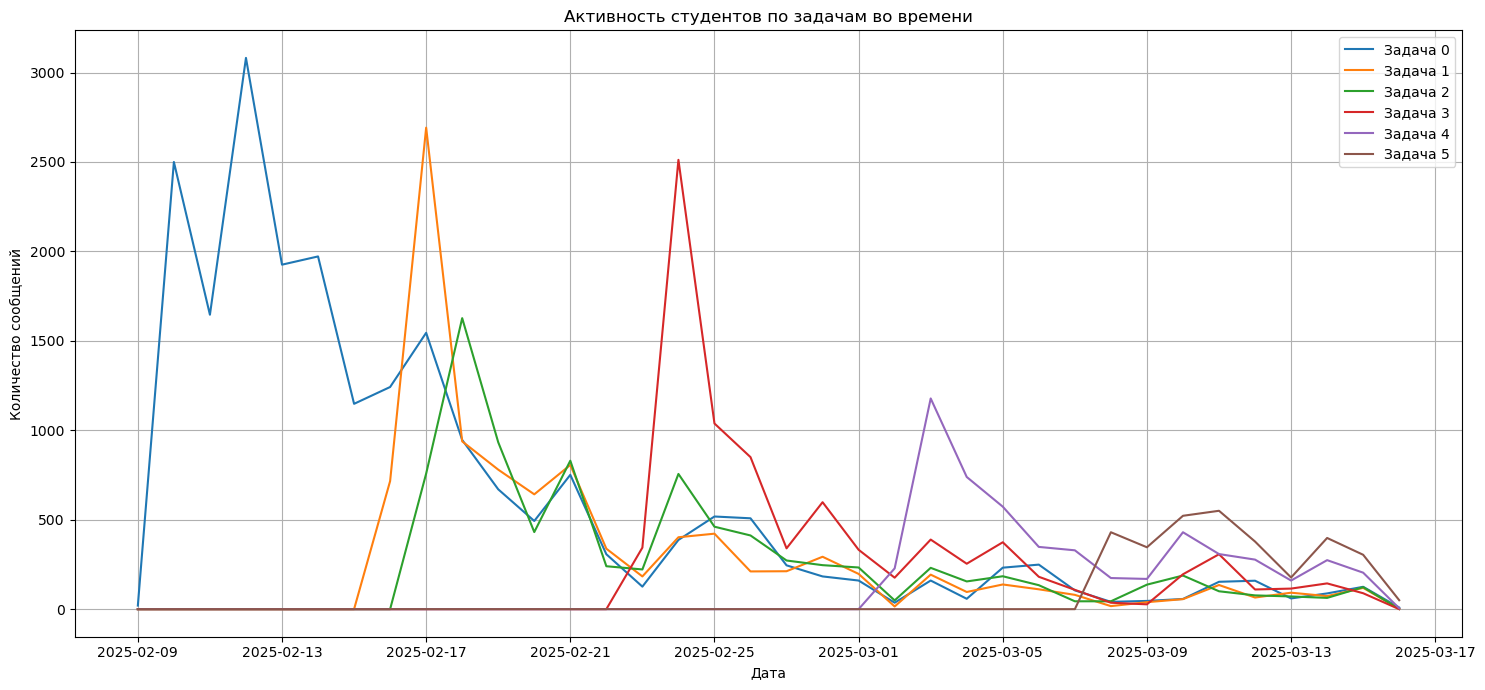

In [15]:
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict, Counter

task_daily_activity = defaultdict(Counter)

for row in messages[1:]:
    task = row[1]
    date = parse_time(row[4]).date() 
    task_daily_activity[task][date] += 1

all_dates = sorted(set(
    date for counts in task_daily_activity.values() for date in counts
))

plt.figure(figsize=(15, 7))

for task, date_counts in task_daily_activity.items():
    y = [date_counts.get(date, 0) for date in all_dates]
    plt.plot(all_dates, y, label=f'Задача {task}')

plt.title('Активность студентов по задачам во времени')
plt.xlabel('Дата')
plt.ylabel('Количество сообщений')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**3.5.** (уровень сложности: средний)

В каких группах было отправлено больше всего сообщений?

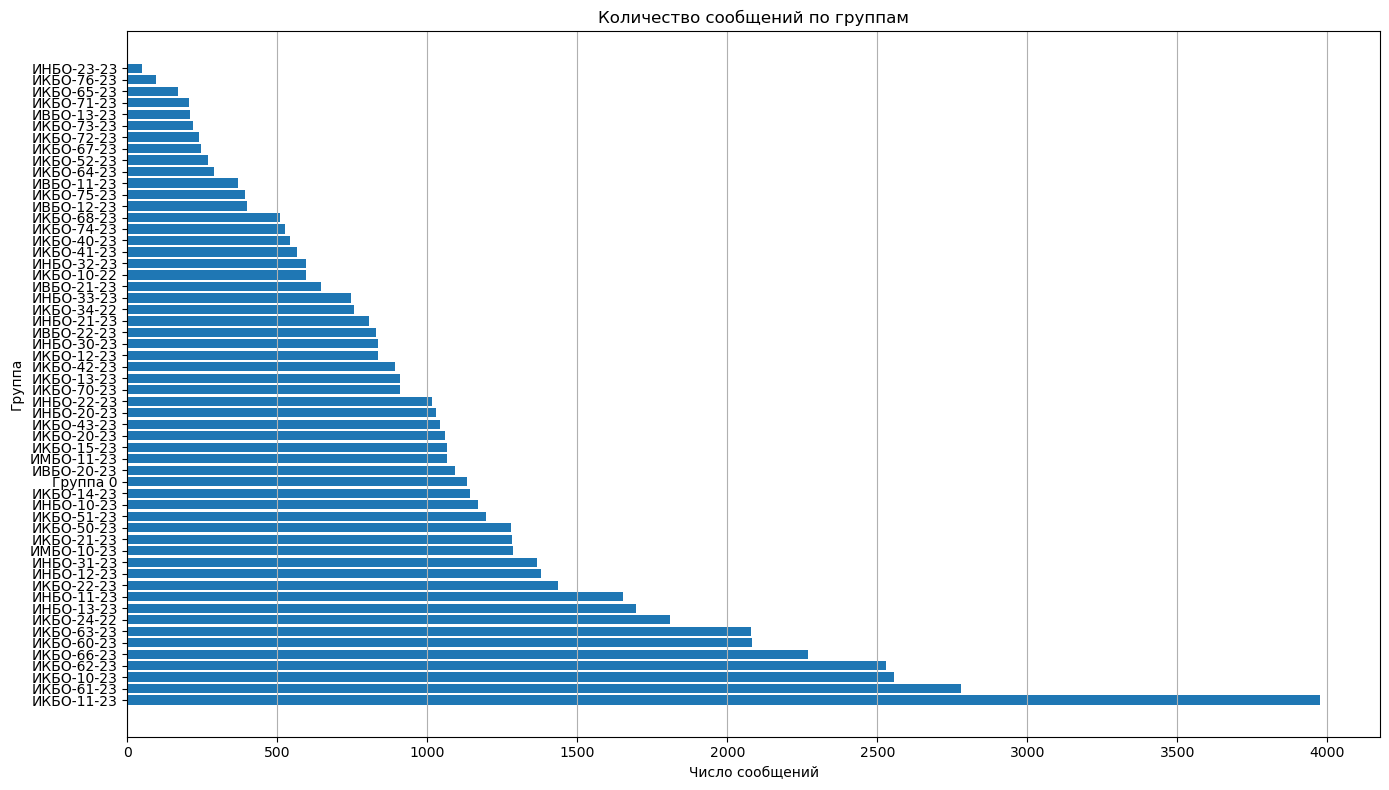

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

group_message_counts = Counter(row[3] for row in messages[1:])

group_id_to_title = {row[0]: row[1] for row in groups[1:]}

group_title_counts = [
    (group_id_to_title.get(group_id, f'Группа {group_id}'), count)
    for group_id, count in group_message_counts.items()
]

group_title_counts.sort(key=lambda x: x[1], reverse=True)

titles = [x[0] for x in group_title_counts]
counts = [x[1] for x in group_title_counts]

plt.figure(figsize=(14, 8))
plt.barh(titles, counts)
plt.title('Количество сообщений по группам')
plt.xlabel('Число сообщений')
plt.ylabel('Группа')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


**3.6.** (уровень сложности: средний)

В каких группах было получено больше всего правильных решений? 

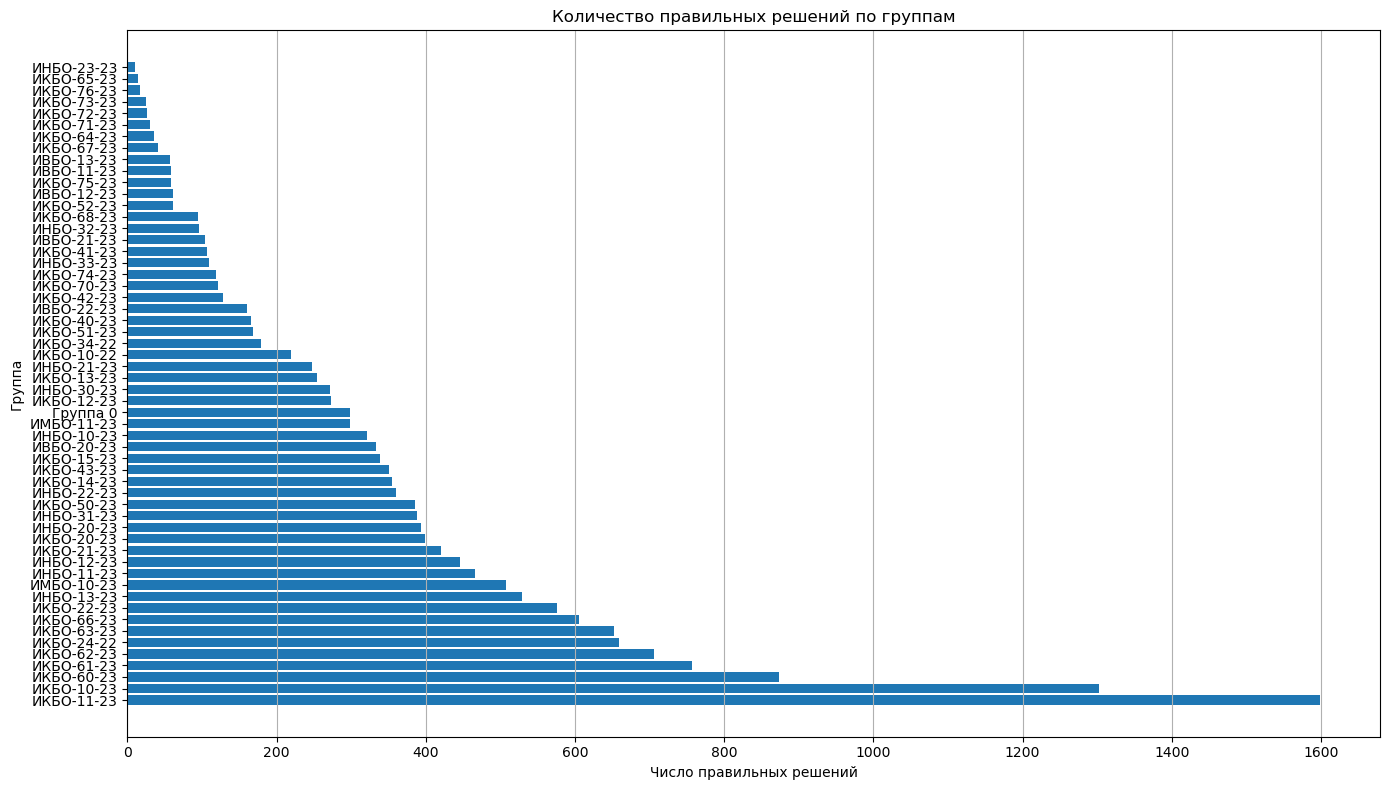

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

correct_message_ids = set(row[1] for row in checks[1:] if row[3] == '2')

group_counter = Counter()
for row in messages[1:]:
    message_id = row[0]
    group_id = row[3]
    if message_id in correct_message_ids:
        group_counter[group_id] += 1

group_id_to_title = {row[0]: row[1] for row in groups[1:]}
group_title_counts = [
    (group_id_to_title.get(group_id, f'Группа {group_id}'), count)
    for group_id, count in group_counter.items()
]

group_title_counts.sort(key=lambda x: x[1], reverse=True)

titles = [x[0] for x in group_title_counts]
counts = [x[1] for x in group_title_counts]

plt.figure(figsize=(14, 8))
plt.barh(titles, counts)
plt.title('Количество правильных решений по группам')
plt.xlabel('Число правильных решений')
plt.ylabel('Группа')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


**3.7.** (уровень сложности: средний)

Какие задачи оказались самыми легкими, самыми сложными?

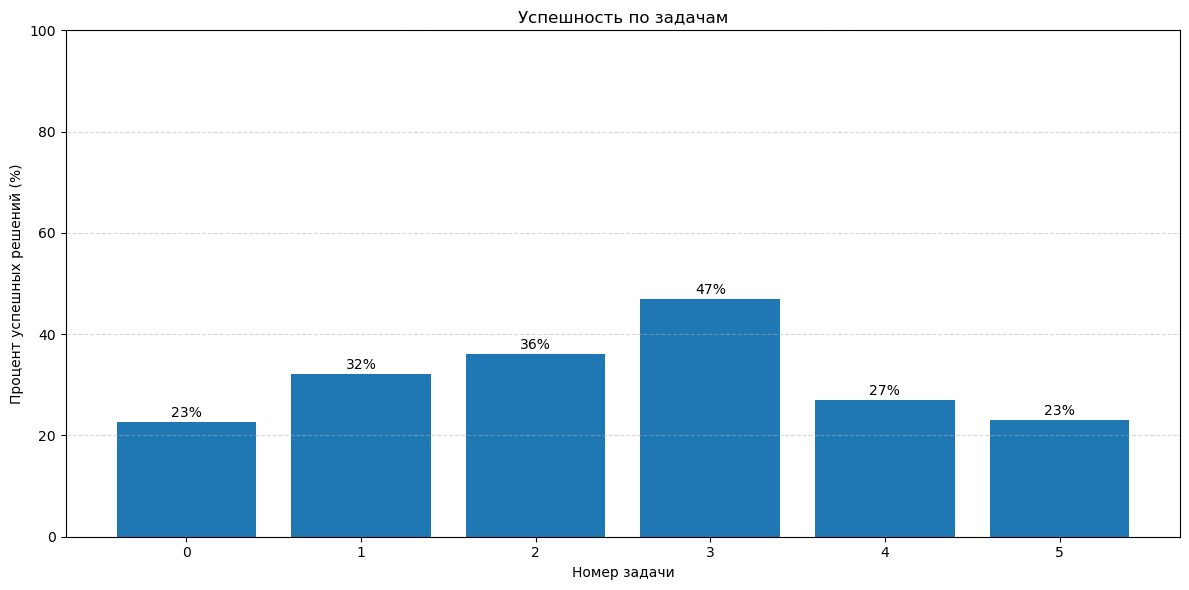

In [51]:
from collections import defaultdict
import matplotlib.pyplot as plt

status_by_message = {int(row[1]): int(row[3]) for row in checks[1:]}

task_stats = defaultdict(lambda: [0, 0])

for row in messages[1:]:
    message_id = int(row[0])
    task_id = int(row[1])  
    
    task_stats[task_id][0] += 1
    if message_id in status_by_message and status_by_message[message_id] == 2:
        task_stats[task_id][1] += 1

task_ids = sorted(task_stats.keys())
success_rates = [
    (task_id, (correct / total * 100) if total > 0 else 0)
    for task_id, (total, correct) in task_stats.items()
]

success_rates.sort(key=lambda x: x[0])
task_ids = [str(task_id) for task_id, _ in success_rates]
rates = [rate for _, rate in success_rates]

plt.figure(figsize=(12, 6))
bars = plt.bar(task_ids, rates)

plt.xlabel("Номер задачи")
plt.ylabel("Процент успешных решений (%)")
plt.title("Успешность по задачам")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{rate:.0f}%", ha='center')

plt.tight_layout()
plt.show()

**3.8.** (уровень сложности: средний)

Студенты каких групп заработали больше всего достижений? 

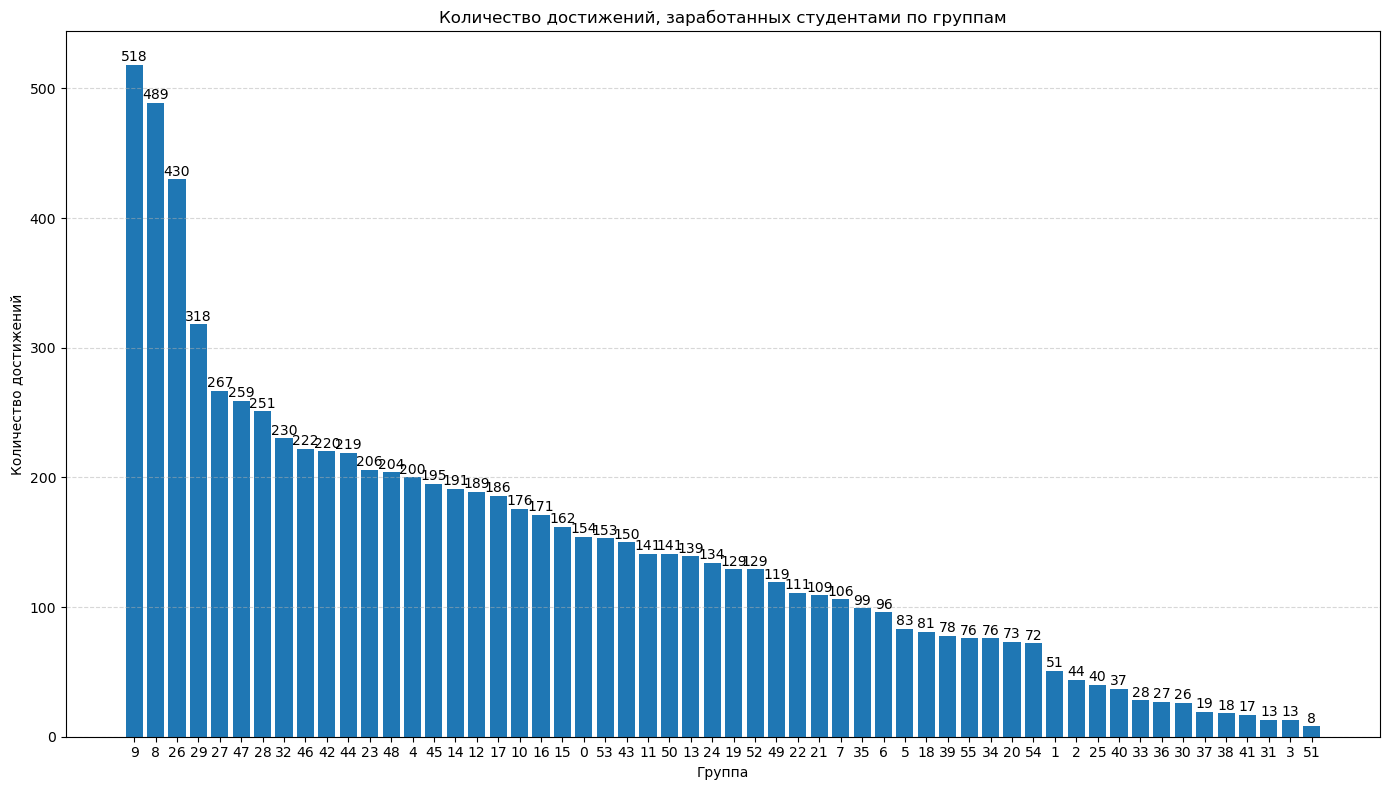

In [36]:
import ast
from collections import defaultdict
import matplotlib.pyplot as plt

group_achievements = defaultdict(int)

for row in statuses[1:]:
    group = row[2]
    ach_str = row[5]
    
    achievements_list = ast.literal_eval(ach_str)
    
    group_achievements[group] += len(achievements_list)

sorted_groups = sorted(group_achievements.items(), key=lambda x: x[1], reverse=True)

groups_labels = [g for g, _ in sorted_groups]
achievements_counts = [c for _, c in sorted_groups]

plt.figure(figsize=(14, 8))
bars = plt.bar(groups_labels, achievements_counts)

plt.xlabel("Группа")
plt.ylabel("Количество достижений")
plt.title("Количество достижений, заработанных студентами по группам")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, count in zip(bars, achievements_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**3.9.** (уровень сложности: средний)

Кто находится на первых 10 местах в рейтинге студентов?

In [41]:
from collections import defaultdict

status_by_message = {row[1]: row[3] for row in checks[1:]}

student_correct_counts = defaultdict(int)

for row in messages[1:]:
    message_id = row[0]
    variant = row[2]
    group = row[3]
    student = (variant, group)

    if message_id in status_by_message and status_by_message[message_id] == '2':
        student_correct_counts[student] += 1

top_students = sorted(student_correct_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Топ-10 студентов по количеству успешных сообщений:")
for (variant, group), count in top_students:
    print(f"Студент variant={variant}, group={group}: {count} успешных сообщений")

Топ-10 студентов по количеству успешных сообщений:
Студент variant=10, group=16: 321 успешных сообщений
Студент variant=6, group=15: 205 успешных сообщений
Студент variant=29, group=9: 194 успешных сообщений
Студент variant=9, group=17: 175 успешных сообщений
Студент variant=17, group=28: 170 успешных сообщений
Студент variant=11, group=17: 165 успешных сообщений
Студент variant=26, group=42: 143 успешных сообщений
Студент variant=9, group=13: 137 успешных сообщений
Студент variant=7, group=8: 126 успешных сообщений
Студент variant=12, group=14: 109 успешных сообщений


**3.10.** (уровень сложности: средний)

В каких группах студенты чаще решают задачи различными способами?

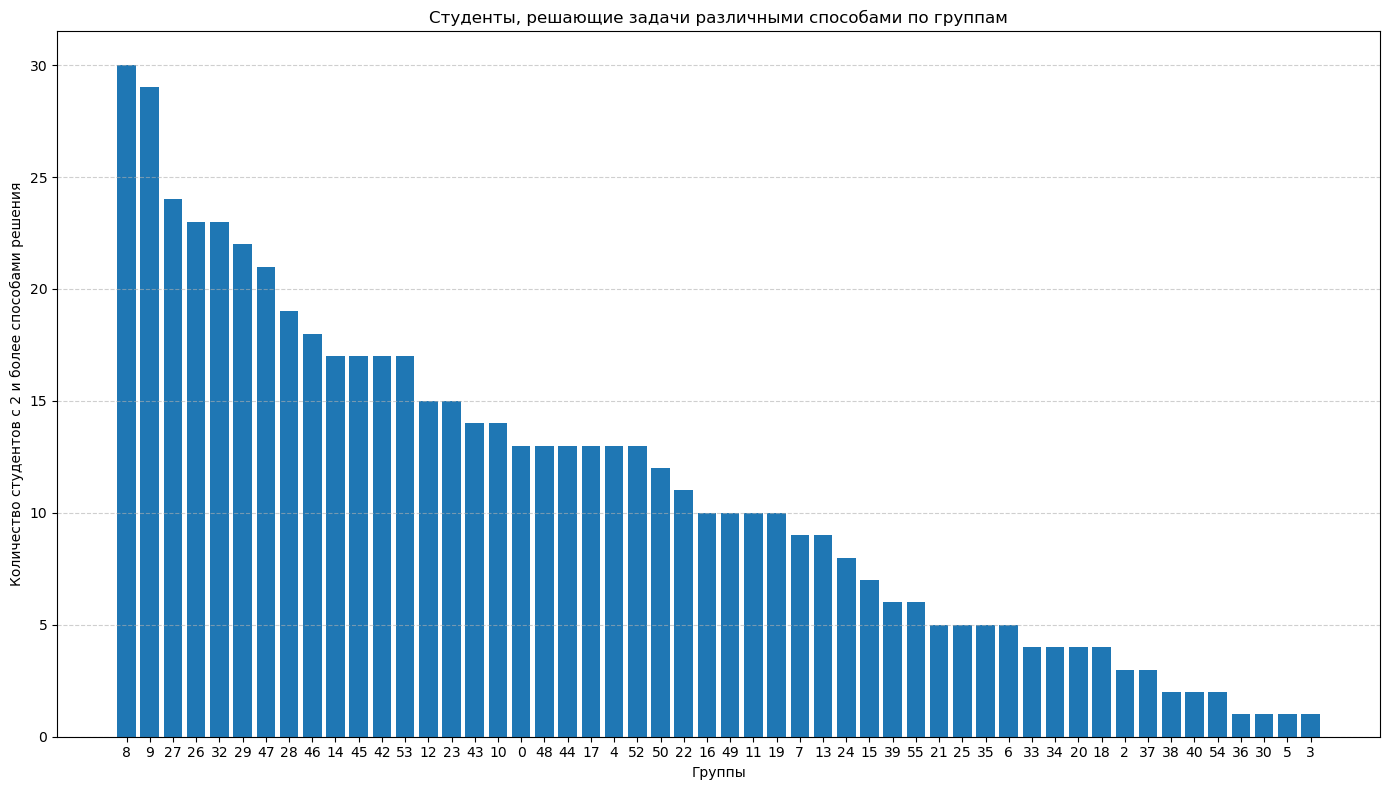

In [48]:
import ast
from collections import defaultdict
import matplotlib.pyplot as plt

students_with_multiple_ways = set()

for row in statuses[1:]:
    task, variant, group, time, status, achievements_str = row
    achievements_list = ast.literal_eval(achievements_str)

    if len(achievements_list) >= 2:
        students_with_multiple_ways.add((variant, group))

group_counts = defaultdict(int)
for variant, group in students_with_multiple_ways:
    group_counts[group] += 1

sorted_groups = sorted(group_counts.items(), key=lambda x: x[1], reverse=True)

groups = [g for g, _ in sorted_groups]
counts = [c for _, c in sorted_groups]

plt.figure(figsize=(14, 8))
plt.bar(groups, counts)

plt.xlabel('Группы')
plt.ylabel('Количество студентов с 2 и более способами решения')
plt.title('Студенты, решающие задачи различными способами по группам')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Проанализируйте [базу данных](https://github.com/Newbilius/Old-Games_DOS_Game_Gauntlet/blob/master/GAMES.csv) старых компьютерных игр.

С помощью графиков ответьте на следующие вопросы:

**3.11.** (уровень сложности: средний)

Какие годы были самыми популярными с точки зрения выхода игр?

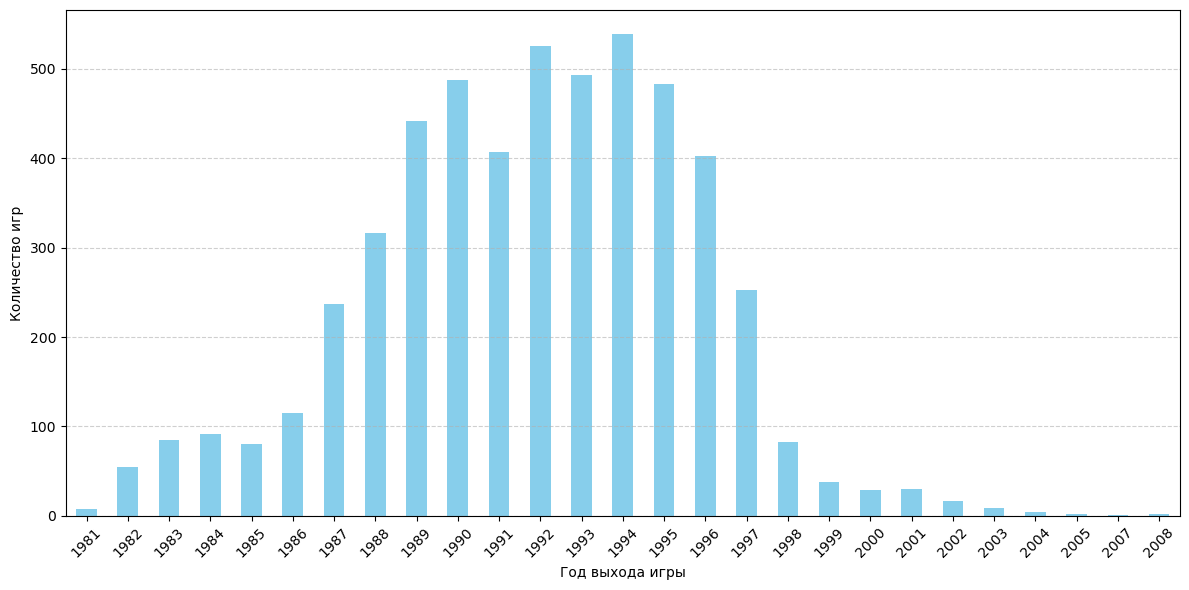

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv('practice_3_last/GAMES.csv', sep=';', header=None, names=['title', 'genre', 'url', 'year'])

games['year'] = games['year'].astype(str).str.strip().str.replace('"', '')

games = games[games['year'].str.match(r'^\d{4}$')]

games['year'] = games['year'].astype(int)

games_by_year = games.groupby('year').size()

plt.figure(figsize=(12, 6))
games_by_year.plot(kind='bar', color='skyblue')

plt.xlabel('Год выхода игры')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.12.** (уровень сложности: средний)

Какие жанры были популярны в различные периоды времени?

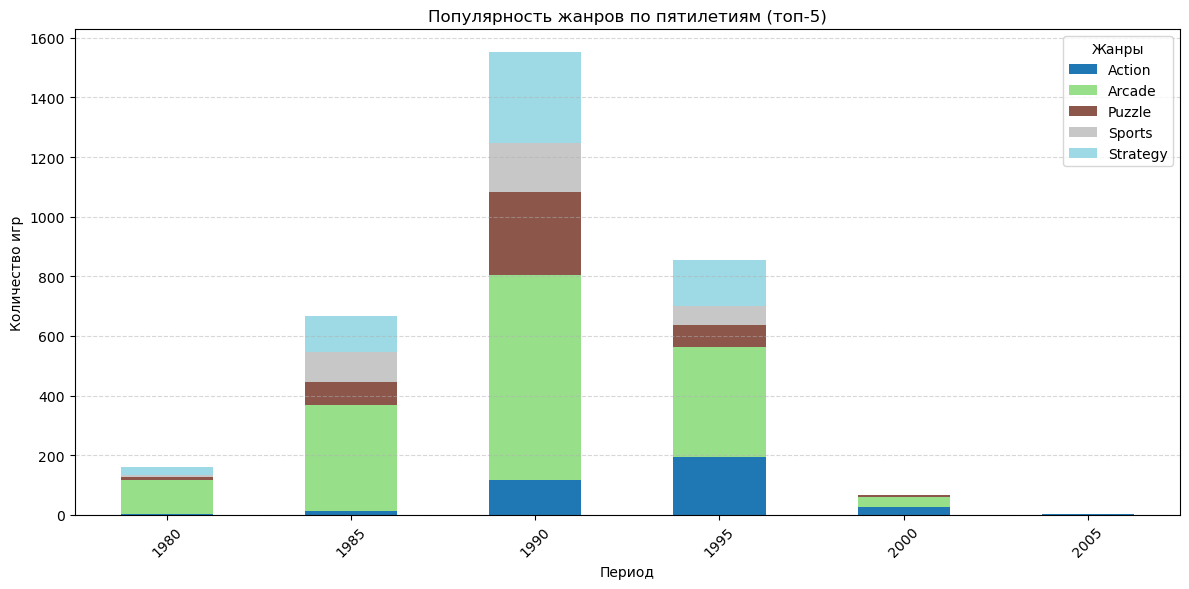

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv("practice_3_last/GAMES.csv", sep=";", header=None, names=["title", "genre", "url", "year"])
games = games[games['year'].str.match(r'^\d{4}$')]
games['year'] = games['year'].astype(int)
games = games[games['year'] >= 1980]
games['period'] = (games['year'] // 5) * 5

top_genres = games['genre'].value_counts().nlargest(5).index
filtered = games[games['genre'].isin(top_genres)]
genre_counts = filtered.groupby(['period', 'genre']).size().unstack(fill_value=0)

genre_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Популярность жанров по пятилетиям (топ-5)")
plt.xlabel("Период")
plt.ylabel("Количество игр")
plt.xticks(rotation=45)
plt.legend(title="Жанры")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()